In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData0 = pd.read_csv('Data.csv', index_col=0);
MergedData1 = MergedData0.iloc[:, :-1]
y = pd.read_csv("colon_training_genes_set.csv", index_col='gene')
y.rename_axis("DepMap_ID")
y = y == 'positive'
data = MergedData1.merge(y, how='inner', left_index=True, right_index=True)
Data = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
ABCG5,0.053855,0.058180,0.012528,0.021711,0.033096,0.056243,0.008624,0.049693,0.030266,0.024696,...,0.000000,0.014355,0.014355,0.000000,0.000000,0.070389,0.042644,0.000000,0.014355,0.014355
ABCG5,0.053855,0.058180,0.012528,0.021711,0.033096,0.056243,0.008624,0.049693,0.030266,0.024696,...,0.000000,0.014355,0.014355,0.000000,0.000000,0.070389,0.042644,0.000000,0.014355,0.014355
ABHD16B,0.014877,0.026521,0.057486,0.021454,0.064959,0.026275,0.016087,0.038528,0.105143,0.023111,...,0.000000,0.163499,1.536053,0.000000,0.918386,0.000000,0.000000,0.000000,0.000000,0.495695
ABI3,0.006700,0.001935,0.039448,0.003994,0.104724,0.003303,0.041314,0.015038,0.037875,0.016541,...,0.214125,0.000000,0.014355,0.201634,0.485427,1.454176,0.000000,0.650765,0.014355,4.000000
ABI3,0.006700,0.001935,0.039448,0.003994,0.104724,0.003303,0.041314,0.015038,0.037875,0.016541,...,0.214125,0.000000,0.014355,0.201634,0.485427,1.454176,0.000000,0.650765,0.014355,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF92,0.018109,0.392637,0.050899,0.153188,0.062893,0.210178,0.113357,0.029641,0.133298,0.040396,...,5.416840,2.950468,2.944858,3.152183,2.080658,5.514122,4.116864,2.121015,2.809414,3.223423
ZNRF2,0.016917,0.006564,0.040396,0.030776,0.002572,0.042265,0.022099,0.037135,0.035908,0.086099,...,2.344828,2.084064,2.596935,0.310340,1.815575,4.280214,2.650765,2.601697,3.145677,2.967169
ZNRF3,0.033445,0.041844,0.009077,0.003706,0.032957,0.003473,0.033131,0.089468,0.072750,0.007346,...,1.752749,1.298658,3.385431,2.443607,1.978196,2.046142,1.104337,1.220330,1.941106,2.702658
ZZZ3,0.324623,0.042530,0.050412,0.274833,0.269194,0.125139,0.306162,0.580409,0.077300,0.100964,...,4.926948,4.489928,4.135863,3.804260,4.325530,4.258519,3.765535,4.780310,4.276497,4.519793


ABCG5      False
ABCG5      False
ABHD16B    False
ABI3       False
ABI3       False
           ...  
ZNF92      False
ZNRF2      False
ZNRF3       True
ZZZ3       False
ZZZ3       False
Name: label, Length: 1336, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.8201485  0.01038302 0.0075951  0.00671409 0.00511578 0.00451562
 0.00429692 0.00346973]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.86376817 0.00738237 0.00521235 0.00492999 0.00406195 0.0031907
 0.00276672 0.00241891]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.81799389 0.02442051 0.02047289 0.01202733 0.00550121 0.00443658
 0.00402395 0.00366094]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(1336, 24)


(443, 24)
(443,)
220


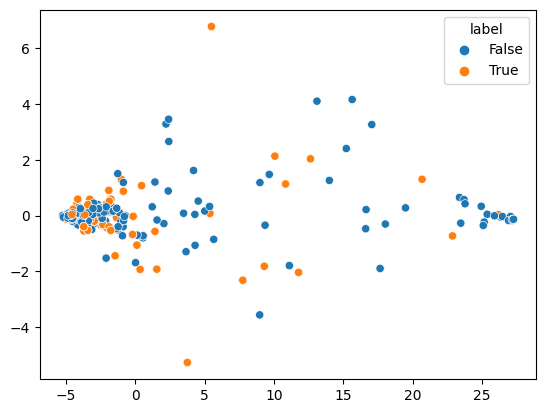

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.6691729323308271
Precision:0.7058823529411765
Recall:0.5538461538461539


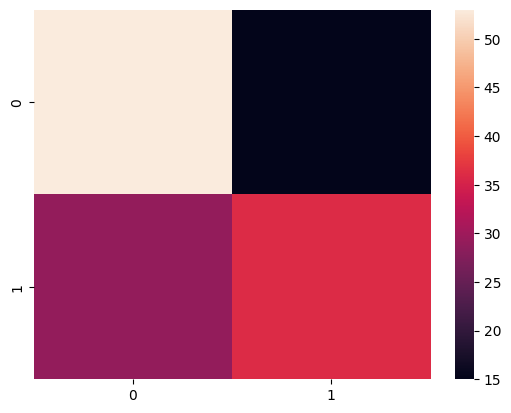

[[53 15]
 [29 36]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
10/10 [==============================] - 3s 98ms/step - loss: 4.3502 - accuracy: 0.3226 - val_loss: 3.2969 - val_accuracy: 0.4436
Epoch 2/5
10/10 [==============================] - 0s 23ms/step - loss: 1.5975 - accuracy: 0.4452 - val_loss: 1.9981 - val_accuracy: 0.4586
Epoch 3/5
10/10 [==============================] - 0s 50ms/step - loss: 1.2007 - accuracy: 0.5065 - val_loss: 1.8840 - val_accuracy: 0.4436
Epoch 4/5
10/10 [==============================] - 0s 36ms/step - loss: 1.3897 - accuracy: 0.5387 - val_loss: 1.6982 - val_accuracy: 0.4662
Epoch 5/5
10/10 [==============================] - 0s 47ms/step - loss: 1.1219 - accuracy: 0.5839 - val_loss: 1.8749 - val_accuracy: 0.4511


Text(0, 0.5, 'Loss')

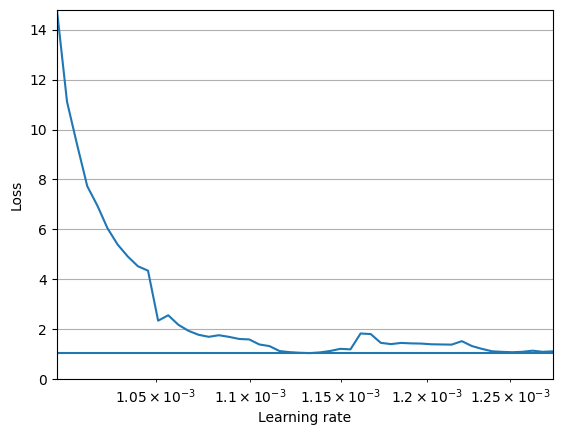

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 1.0502586364746094
Best learning rate: 0.0011327956


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "colontypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\colontypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("colontypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
10/10 [==============================] - 2s 94ms/step - loss: 5.5061 - accuracy: 0.3484 - val_loss: 2.5420 - val_accuracy: 0.4436
Epoch 2/200
10/10 [==============================] - 0s 33ms/step - loss: 2.2960 - accuracy: 0.4452 - val_loss: 1.6724 - val_accuracy: 0.5714
Epoch 3/200
10/10 [==============================] - 0s 34ms/step - loss: 1.4637 - accuracy: 0.5258 - val_loss: 1.4689 - val_accuracy: 0.4962
Epoch 4/200
10/10 [==============================] - 0s 32ms/step - loss: 1.2757 - accuracy: 0.5613 - val_loss: 1.1655 - val_accuracy: 0.4887
Epoch 5/200
10/10 [==============================] - 0s 38ms/step - loss: 1.0877 - accuracy: 0.5871 - val_loss: 1.0037 - val_accuracy: 0.5489
Epoch 6/200
10/10 [==============================] - 0s 35ms/step - loss: 0.8615 - accuracy: 0.6065 - val_loss: 0.9675 - val_accuracy: 0.6316
Epoch 7/200
10/10 [==============================] - 0s 39ms/step - loss: 0.7792 - accuracy: 0.6290 - val_loss: 0.9263 - val_accuracy: 0.5639
Epoch 

In [24]:
model = keras.models.load_model("colontypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

10/10 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.7613


[0.4899553954601288, 0.7612903118133545]

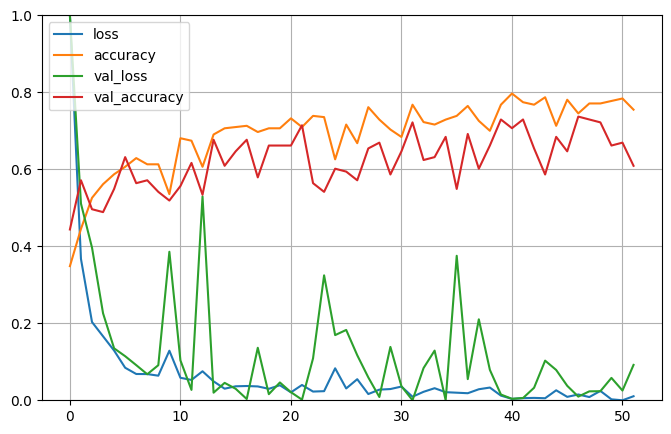

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()